# Assignment 1 (Coding Part)

- Implement the required code for each problem in the allocated area.
- Write down your comments clearly.
- Please submit your notebook with outputs displayed.

## Exercise 1.10

In [152]:
import numpy as np
import matplotlib.pyplot as plt

import random
def flip_coin():
    # TODO: add fair coin flipping experiment code
    # here we return head or tail randomly
    # 1 is head, 0 is tail
    return random.choice([0, 1])

### Exercise 1.10 (a)

In [153]:
# TODO: add solution for point a
'''
mu means the true probability of head
as we know, the true probability of head is 0.5 as it is a fair coin
then mu = 0.5 for c_1 , c_rand, c_min
'''
mu_c_1 = 0.5
mu_c_rand = 0.5
mu_c_min = 0.5

### Exercise 1.10 (b)

In [154]:
# TODO: add solution for point b

def do_experiment(coins = 1000 , flips = 10):
    # this is a list to store the ratio of heads for each coin in the experiment (1000 coins in total / 10 flips per coin)
    heads_ratio_list = []
    for i in range(coins):
        heads = 0
        for j in range(flips):
            heads += flip_coin()
        heads_ratio_list.append(heads/ flips)
    v_1 = heads_ratio_list[0]
    v_rand = heads_ratio_list[random.randint(0, coins-1)]
    # get the minimum value in the list of heads_ratio_list and assign it to v_min (it represents ratios of the coin with the minimum ratio of heads)
    v_min = min(heads_ratio_list)
    return v_1, v_rand, v_min

# repeat the experiment 100000 times and plot the histogram of the distribution of v_1, v_rand, v_min
experiment_times = 100000
v_1_list = []
v_rand_list = []
v_min_list = []
for i in range(experiment_times):
    v_1 , v_rand, v_min = do_experiment()
    v_1_list.append(v_1)
    v_rand_list.append(v_rand)
    v_min_list.append(v_min)

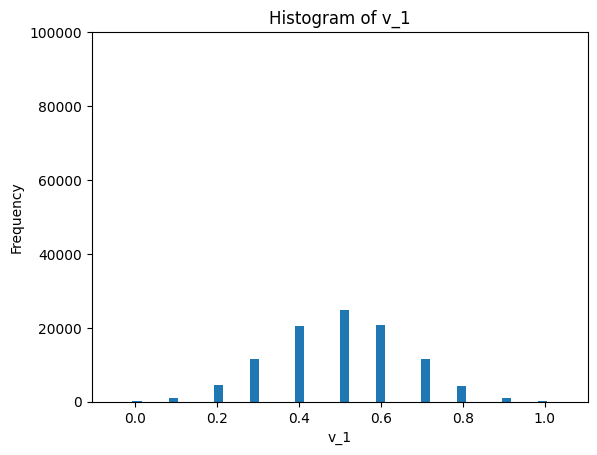

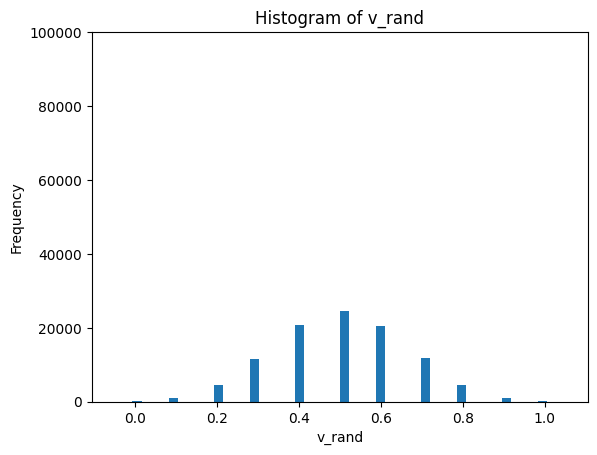

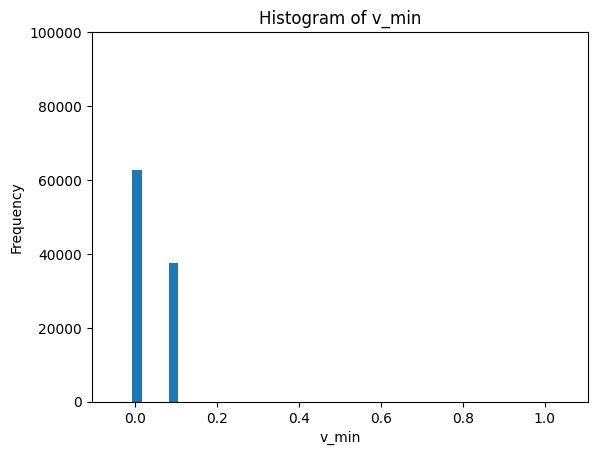

In [155]:
# set the min and max of x axis
# the +0.05 and -0.05 are used to make the histogram looks better
min_x = -0.05
max_x = 1.05

# set the max of y axis (frequency)
max_y = experiment_times
bins = 50

def plot_histogram(data, title, x_label, y_label):
    '''
    This function is used to plot the histogram of the data with the given title, x label and y label

    Parameters:
        data (list): the data to plot
        title (str): the title of the histogram
        x_label (str): the label of x axis
        y_label (str): the label of y axis    
    '''
    plt.hist(data, bins=bins, range=(min_x, max_x))
    plt.ylim(0, max_y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

plot_histogram(v_1_list, "Histogram of v_1", "v_1", "Frequency")
plot_histogram(v_rand_list, "Histogram of v_rand", "v_rand", "Frequency")
plot_histogram(v_min_list, "Histogram of v_min", "v_min", "Frequency")

### Exercise 1.10 (c)

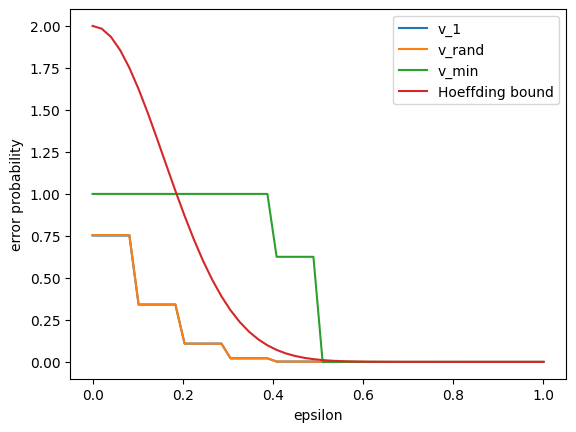

In [156]:
# TODO: add solution for point c

def error_probability(mu, v, epsilon):
    '''
    This function is used to calculate the error probability of v with the given mu and epsilon

    Parameters:
        mu (float): the true probability of head
        v (list): the list of the ratio of heads for each coin in the experiment
        epsilon (float): the error threshold
    '''
    # create a numpy array of mu with the same length as v
    mu_arr = np.full(len(v), mu) 
    # calculate the error probability 
    # the error probability is the ratio of the number of elements in v that are far from mu with more than epsilon to the total number of elements in v
    error_prop = (np.abs(v - mu_arr) > epsilon).mean()
    return error_prop

def calc_hoeffding_bound(epsilon, N):
    '''
    This function is used to calculate the Hoeffding bound with the given epsilon and N

    Parameters:
        epsilon (float): the error threshold
        N (int): the number of training examples
    '''
    return 2 * np.exp(-2 * (epsilon**2) * N)

# create a list of epsilons from 0 to 1 with 50 elements in total
epsilons = np.linspace(0, 1, 50)

# calculate the error probability of v_1 , v_rand , v_min for different epsilons
c_1_error_list = []
c_rand_error_list = []
c_min_error_list = []
hoeffding_bound_list = []
for epsilon in epsilons:
    c_1_error_list.append(error_probability(0.5, v_1_list, epsilon))
    c_rand_error_list.append(error_probability(0.5, v_rand_list, epsilon))
    c_min_error_list.append(error_probability(0.5, v_min_list, epsilon))
    hoeffding_bound_list.append(calc_hoeffding_bound(epsilon, 10))

# plot the error probability of v_1 , v_rand , v_min for different epsilons on the same plot
plt.plot(epsilons, c_1_error_list, label="v_1")
plt.plot(epsilons, c_rand_error_list, label="v_rand")
plt.plot(epsilons, c_min_error_list, label="v_min")
plt.plot(epsilons, hoeffding_bound_list, label="Hoeffding bound")
plt.xlabel("epsilon")
plt.ylabel("error probability")
plt.legend()
plt.show()

### Exercise 1.10 (d)

In [157]:
# TODO: add solution for point d
''' 
as shown in the plot v_1 and v_rand obey the Hoeffding bound but v_min does not obey the Hoeffding bound
the reason for v min not obeying the Hoeffding bound is that it violates the assumption of the Hoeffding bound
that the samples are random and independent but v_min is not random and not independent because it is the minimum of the samples
so it is dependent on the training samples we are using

As we studied, taking the best model from a set of models makes us use more loose bound than the Hoeffding bound
the same example is here, taking the minimum of the samples makes us need a looser bound than the Hoeffding bound
'''

' \nas shown in the plot v_1 and v_rand obey the Hoeffding bound but v_min does not obey the Hoeffding bound\nthe reason for v min not obeying the Hoeffding bound is that it violates the assumption of the Hoeffding bound\nthat the samples are random and independent but v_min is not random and not independent because it is the minimum of the samples\nso it is dependent on the training samples we are using\n\nAs we studied, taking the best model from a set of models makes us use more loose bound than the Hoeffding bound\nthe same example is here, taking the minimum of the samples makes us need a looser bound than the Hoeffding bound\n'

### Exercise 1.10 (e)

In [158]:
# TODO: add solution for point e
'''
The mapping from the coins to the bins is as follows:
    - c_1 and c_rand like choosing a bin randomly so it obeys the Hoeffding bound.
    - c_min like choosing the bin with minimum error after the data set is knonw and the 
      best bin is obtained so it does not obey the Hoeffding bound.
    
    - What happends for the case of coins can be generalized to the case of choosing a bin from M bins.
    - Choosing a bin randomly is like choosing a coin randomly and it obeys the Hoeffding bound.
    - Choosing a specific bin with the minimum error is like choosing a specific coin with minimum number of heads and both
      of them do not obey the Hoeffding bound because they are not random and independent.

What happend for 100,000 can be applied to highrt and general values of M.
The problem is not with the number of bins but with the fact that we are not choosing a bin randomly.
So the same conclusion can be applied to higher values of M.
'''

'\nThe mapping from the coins to the bins is as follows:\n    - c_1 and c_rand like choosing a bin randomly so it obeys the Hoeffding bound.\n    - c_min like choosing the bin with minimum error after the data set is knonw and the \n      best bin is obtained so it does not obey the Hoeffding bound.\n    \n    - What happends for the case of coins can be generalized to the case of choosing a bin from M bins.\n    - Choosing a bin randomly is like choosing a coin randomly and it obeys the Hoeffding bound.\n    - Choosing a specific bin with the minimum error is like choosing a specific coin with minimum number of heads and both\n      of them do not obey the Hoeffding bound because they are not random and independent.\n\nWhat happend for 100,000 can be applied to highrt and general values of M.\nThe problem is not with the number of bins but with the fact that we are not choosing a bin randomly.\nSo the same conclusion can be applied to higher values of M.\n'

## Problem 1.4

### Problem 1.4 (a)

In [159]:
def generate_dataset(n , d , max = 100 , min = -100 ,  weights = [] , seed = None):
    # TODO: add dataset generation code
    '''
    This function is used to generate a random dataset with size = n and dimension = d

    Parameters:
        n (int): the size of the dataset
        d (int): the dimension of the dataset
        max (int): the maximum value of the data points
        min (int): the minimum value of the data points
        weights (list): the weights of the target function (if not given, it will be generated randomly)
        seed (int): the seed for the random number generator (if not given, it will be generated randomly)
    '''

    # Generate target function weights
    target_weights = np.random.rand(d+1) * 2 - 1 if len(weights) == 0 else weights
    
    # Generate n random data points with constant seed for reproducibility
    # if seed is not given, it will be generated randomly
    if seed is not None:
        np.random.seed(seed)
    # generate n random data points with dimension d and values between -100 and 100
    X = np.random.rand(n, d) *  (max - min) + min
    
    # Add a column of ones for the bias term
    X = np.hstack((np.ones((n, 1)), X))
    
    # Calculate labels for each data point using the target function
    y = np.sign(X.dot(target_weights))
    
    return X, y, target_weights

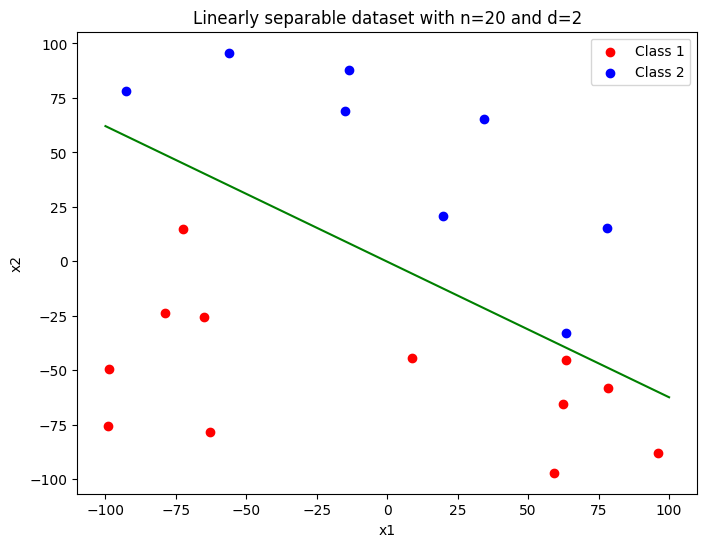

In [160]:
def plot_data_points(X, y, x_label = 'x1', y_label = 'x2', title = 'Linearly separable dataset with n=20 and d=2'):
    '''
    This function is used to plot the data points in the dataset

    Parameters:
        X (numpy array): the dataset
        y (numpy array): the labels of the dataset
        x_label (str): the label of the x axis
        y_label (str): the label of the y axis
        title (str): the title of the plot
    '''
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y==1, 1], X[y==1, 2], color='red', label='Class 1')
    plt.scatter(X[y==-1, 1], X[y==-1, 2], color='blue', label='Class 2')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

def plot_function(function_weights, label = 'Target function' , color = 'green'):
    '''
    This function is used to plot the target function and the hypothesis function

    Parameters:
        function_weights (numpy array): the weights of the target function
        label (str): the label of the target function
        color (str): the color of the target function
    '''

    # set the range of the x axis and y axis
    x1 = np.linspace(-100, 100, 1000)
    x2 = (-function_weights[0] - function_weights[1]*x1) / function_weights[2]

    # plot the function
    plt.plot(x1, x2, color=color, label=label)

# Generate the dataset
X, y, target_weights = generate_dataset(n=20, d=2 ,weights = [-0.13238479 ,  -0.584452 ,  -0.93964714] , seed=100)

# Plot the data points
plot_data_points(X, y)

# Plot the target function
plot_function(target_weights)

plt.show()

### Problem 1.4 (b)

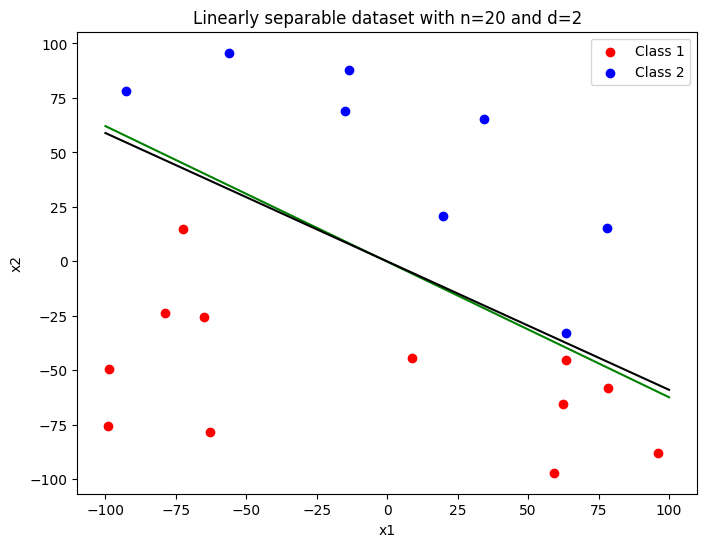

In [161]:
def run_perceptron_learning(data_points, d):
    '''
    This function is used to run the perceptron learning algorithm on the given data points

    Parameters:
        data_points (list): the data points of the dataset (each data point is a tuple of the label and the data point)
        d (int): the dimension of the data points
    '''

    # initialize the weights to zero
    W = np.zeros(shape=(d + 1,))
    
    # initialize the number of updates to zero
    number_of_updates = 0
    while True:
        m = 0
        for point in data_points:
            # check if the point is misclassified
            if point[0] * np.dot(W.T, point[1]) <= 0:
                # update the weights using the perceptron learning rule and update the number of updates
                W += point[0] * point[1]
                m += 1
                number_of_updates += 1
        # break if there is no misclassified point
        if m == 0:
            break
    # return the final weights and the number of updates
    return (W, number_of_updates)

def construct_data_points(X, y):
    ''' 
    This function is used to construct the data points from the dataset X and the labels y 
    in the form of a list of tuples of the label and the data point 

    Parameters:
        X (numpy array): the dataset
        y (numpy array): the labels of the dataset
    '''

    data_points = []
    # construct the data points from the dataset X and the labels y
    # for each data point, add a tuple of the label and the data point to the list of data points
    for i in range(len(X)):
        data_points.append((y[i], X[i]))
    return data_points

# construct the data points
data_points = construct_data_points(X, y)

# run the perceptron learning algorithm
weights, number_of_updates = run_perceptron_learning(data_points, 2)

# plot the data points
plot_data_points(X, y)

# plot the target function
plot_function(target_weights)

# plot the final hypothesis function
plot_function(weights, label = 'Final hypothesis function', color = 'black')

plt.show()

In [162]:
# TODO: add solution for the rest of the point
print("number of updates: ", number_of_updates)
'''  
- the number of updates is 12
- f is close to g as shown in the plot
'''

number of updates:  12


### Problem 1.4 (c)

number of updates:  20


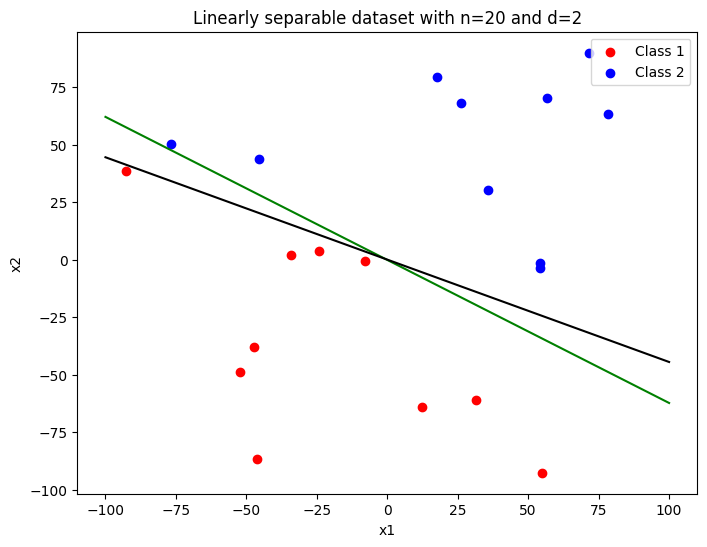

In [163]:
# TODO: add solution for point c

# Generate the dataset
X, y, target_weights = generate_dataset(n=20, d=2 ,weights = [-0.13238479 ,  -0.584452 ,  -0.93964714] , seed=20)

# construct the data points
data_points = construct_data_points(X, y)

# run the perceptron learning algorithm
weights, number_of_updates = run_perceptron_learning(data_points, 2)

# plot the data points
plot_data_points(X, y)

# plot the target function
plot_function(target_weights)

# plot the final hypothesis function
plot_function(weights, label = 'Final hypothesis function', color = 'black')

print("number of updates: ", number_of_updates)
'''
- The number of updates is 20
- g is close to f but in b g was closer to f
- g is closer to f in b, because the data points around f in the bottom left corner were close to f
  this lead to a smaller number of options and a causes the hypothesis function to be closer to f
'''

plt.show()

### Problem 1.4 (d)

number of updates:  25


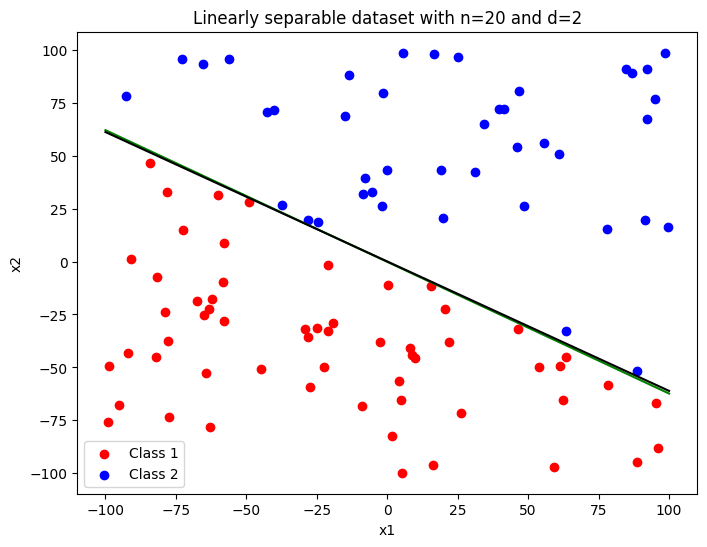

In [172]:
# TODO: add solution for point d

# Generate the dataset with n = 100
X, y, target_weights = generate_dataset(n=100, d=2 ,weights = [-0.13238479 ,  -0.584452 ,  -0.93964714] , seed=100)

# construct the data points
data_points = construct_data_points(X, y)

weights, number_of_updates = run_perceptron_learning(data_points, 2)

# plot the data points
plot_data_points(X, y)

# plot the target function
plot_function(target_weights)

# plot the final hypothesis function
plot_function(weights, label = 'Final hypothesis function', color = 'black')

print("number of updates: ", number_of_updates)
'''  
- the number of updates is 25
- f is close to g and g is more close to f than in b
- From hoeffding's inequality we know that the probability of the hypothesis function being close to the target function
  increases with the number of data points and this justifies the result. From heoffding's inequality, the number of 
  training points when increased , the bound decreases and the probability of the hypothesis function being close to the
    target function increases but it does not guarantee that the hypothesis function will be closer to the target function 
    compared to the number of training points in b.
- In general, increasing the number of data points increases the accuracy of the genetlization of the hypothesis function.
'''

plt.show()

### Problem 1.4 (e)

number of updates:  85


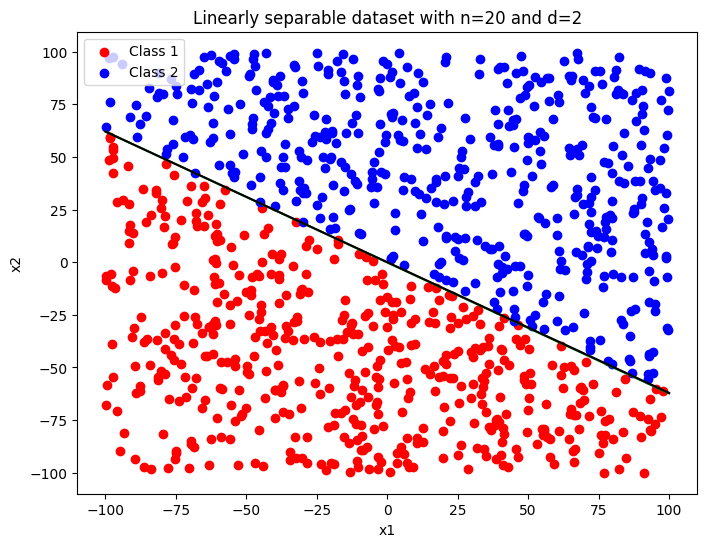

In [173]:
# TODO: add solution for point e
# Generate the dataset with n = 1000
X, y, target_weights = generate_dataset(n=1000, d=2 ,weights = [-0.13238479 ,  -0.584452 ,  -0.93964714] , seed=400)

# construct the data points
data_points = construct_data_points(X, y)

weights, number_of_updates = run_perceptron_learning(data_points, 2)

# plot the data points
plot_data_points(X, y)

# plot the target function
plot_function(target_weights)

# plot the final hypothesis function
plot_function(weights, label = 'Final hypothesis function', color = 'black')

print("number of updates: ", number_of_updates)
'''  
- the number of updates is 85
- f is close to g and g is more close to f than in b
- From hoeffding's inequality we know that the probability of the hypothesis function being close to the target function
  increases with the number of data points and this justifies the result. 
- The number of training points is very high compared to b, so the bound dcreases significantly and g becomes closer to f and almost the same as f
'''

plt.show()

### Problem 1.4 (f)

In [180]:
X, y, target_weights = generate_dataset(n=1000, d=10 ,weights = [] , seed=10)

# construct the data points
data_points = construct_data_points(X, y)

weights, number_of_updates = run_perceptron_learning(data_points, 10)

print("number of updates: ", number_of_updates)
''' 
- The number of updates is 7724
- The number of updates is very high compared to the previous cases
'''

number of updates:  7724


### Problem 1.4 (g)

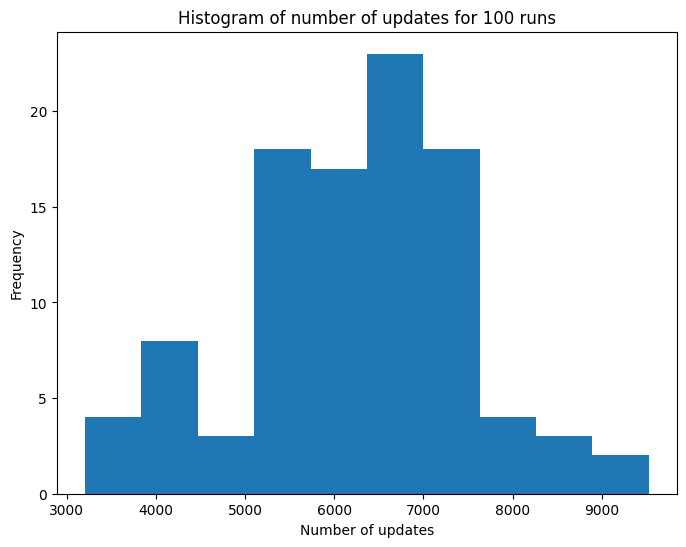

In [181]:
updates_list = []
for i in range(100):
    # permute the data points
    np.random.shuffle(data_points)
    weights, number_of_updates = run_perceptron_learning(data_points, 10)
    updates_list.append(number_of_updates)

plt.figure(figsize=(8, 6))
plt.hist(updates_list, bins=10)
plt.xlabel('Number of updates')
plt.ylabel('Frequency')
plt.title('Histogram of number of updates for 100 runs')
plt.show()

### Problem 1.4 (g)

In [168]:
'''
The number of dimensions and number of training examples don't affect the accuracy in terms of the number of 
correctly classified points. But in terms of generalization, the number of training examples makes 
g closer to f and this also can be concluded from hoefding's inequality. Inceasing the number of training 
examples makes the sample average closer to the population average.

Increasing the number of training examples makes increases the time complexity of the algorithm , because it in general makes 
the number of updates higher.

Increasing the number of dimensions makes the time complexity of the algorithm higher, because it requires more computations to 
calculate the dot product of the weights and the data point.
'''

"\nThe number of dimensions and number of training examples don't affect the accuracy in terms of the number of \ncorrectly classified points. But in terms of generalization, the number of training examples makes \ng closer to f and this also can be concluded from hoefding's inequality. Inceasing the number of training \nexamples makes the sample average closer to the population average.\n\nIncreasing the number of training examples makes increases the time complexity of the algorithm , because it in general makes \nthe number of updates higher.\n\nIncreasing the number of dimensions makes the time complexity of the algorithm higher, because it requires more computations to \ncalculate the dot product of the weights and the data point.\n"